In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, ReLU, BatchNormalization, AveragePooling2D, Add
from keras import layers
from tensorflow import Tensor
from tensorflow.keras.models import Model

Using TensorFlow backend.


In [2]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
img_rows, img_cols = 28, 28

8


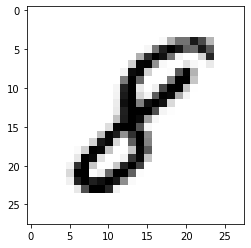

In [3]:
# sample image
image_index = 7777
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
# reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing the RGB colors by dividing them to the max RGB value.
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
#CNN

# creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(256, kernel_size=(5,5), activation="relu", strides=1, input_shape=input_shape))
model.add(Conv2D(256, kernel_size=(5,5), activation="relu", strides=1))
model.add(Conv2D(128, kernel_size=(5,5), activation="relu", strides=1))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
# the nn layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 256)       6656      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 256)       1638656   
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       819328    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                81930     
Total params: 2,546,570
Trainable params: 2,546,570
Non-trainable params: 0
______________________________________________

In [7]:
# because it takes a lot of time to fit the data, I am using a simplified version of the network
model = Sequential()
model.add(Conv2D(256, kernel_size=(5,5), activation="relu", strides=1, input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers

model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, 
                    validation_data=(x_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 126s 67ms/step - loss: 1.5601 - accuracy: 0.9045 - val_loss: 1.4838 - val_accuracy: 0.9787
Epoch 2/50
1875/1875 [==============================] - 124s 66ms/step - loss: 1.4840 - accuracy: 0.9784 - val_loss: 1.4788 - val_accuracy: 0.9833
Epoch 3/50
1875/1875 [==============================] - 113s 60ms/step - loss: 1.4786 - accuracy: 0.9831 - val_loss: 1.4791 - val_accuracy: 0.9826
Epoch 4/50
1875/1875 [==============================] - 118s 63ms/step - loss: 1.4760 - accuracy: 0.9857 - val_loss: 1.4774 - val_accuracy: 0.9841
Epoch 5/50
1875/1875 [==============================] - 118s 63ms/step - loss: 1.4736 - accuracy: 0.9880 - val_loss: 1.4766 - val_accuracy: 0.9848
Epoch 6/50
1875/1875 [==============================] - 114s 61ms/step - loss: 1.4722 - accuracy: 0.9894 - val_loss: 1.4764 - val_accuracy: 0.9852
Epoch 7/50
1875/1875 [==============================] - 116s 62ms/step - loss: 1.4712 - accuracy: 0.9901 - val_loss: 1

In [9]:
# model evaluation
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 1.4742 - accuracy: 0.9868


[1.4742182493209839, 0.9868000149726868]

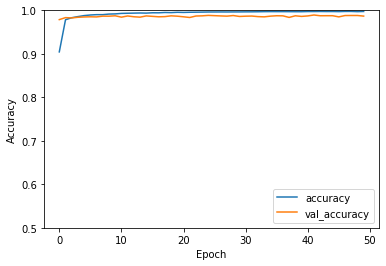

In [10]:
# model evaluation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

#test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [11]:
#ResNet


inputs = keras.Input(shape=input_shape)
num_filters = 64
kernel_size = 3
    
x = BatchNormalization()(inputs)
x = Conv2D(kernel_size=3,
        activation = "relu",
        strides=1,
        filters=num_filters,
        padding="same")(x)

y = Conv2D(kernel_size=kernel_size,
        activation="relu",
        strides= 1,
        filters=num_filters,
        padding="same")(x)

y = Conv2D(kernel_size=kernel_size,
        activation="relu",
        strides=1,
        filters=num_filters,
        padding="same")(y)

out = Add()([x, y])
out = ReLU()(out)

out = AveragePooling2D(4)(out)
out = Flatten()(out)

outputs = Dense(10, activation='softmax')(out)
    
model = Model(inputs, outputs, name="ResNet")

model.summary()

Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 1)    4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 64)   640         batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 28, 28, 64)   36928       conv2d_4[0][0]                   
_____________________________________________________________________________________________

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 382s 204ms/step - loss: 1.6723 - accuracy: 0.7887 - val_loss: 1.5007 - val_accuracy: 0.9600
Epoch 2/30
1875/1875 [==============================] - 376s 200ms/step - loss: 1.4945 - accuracy: 0.9665 - val_loss: 1.4832 - val_accuracy: 0.9782
Epoch 3/30
1875/1875 [==============================] - 376s 200ms/step - loss: 1.4893 - accuracy: 0.9717 - val_loss: 1.4881 - val_accuracy: 0.9730
Epoch 4/30
1875/1875 [==============================] - 377s 201ms/step - loss: 1.4882 - accuracy: 0.9729 - val_loss: 1.4841 - val_accuracy: 0.9770
Epoch 5/30
1875/1875 [==============================] - 378s 202ms/step - loss: 1.4876 - accuracy: 0.9734 - val_loss: 1.4831 - val_accuracy: 0.9780
Epoch 6/30
1875/1875 [==============================] - 379s 202ms/step - loss: 1.4855 - accuracy: 0.9757 - val_loss: 1.4806 - val_accuracy: 0.9805
Epoch 7/30
1875/1875 [==============================] - 381s 203ms/step - loss: 1.4856 - accuracy: 0.9756 - val_

In [13]:
# model evaluation
model.evaluate(x_test, y_test)

313/313 [==============================] - 22s 71ms/step - loss: 1.4949 - accuracy: 0.9663


[1.4948866367340088, 0.9663000106811523]

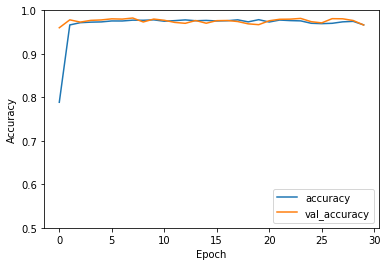

In [14]:
# model evaluation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()